In [ ]:
#Create a 3x3 matrix with random integers, compute mean, median, and standard deviation
import numpy as np

matrix = np.random.randint(1, 11, size=(3, 3))
meanval = np.mean(matrix)
medianval = np.median(matrix)
stddev = np.std(matrix)

print("Matrix:\n", matrix)
print("Mean:", meanval)
print("Median:", medianval)
print("Standard Deviation:", stddev)


Matrix:
 [[3 4 1]
 [5 5 8]
 [1 3 9]]
Mean: 4.333333333333333
Median: 4.0
Standard Deviation: 2.6246692913372702


In [ ]:
#Create two 3x3 matrices, perform matrix multiplication, and compute determinant
matrix1 = np.random.randint(1, 11, size=(3, 3))
matrix2 = np.random.randint(1, 11, size=(3, 3))
product = np.dot(matrix1, matrix2)
determinant = np.linalg.det(product)

print("Matrix 1:\n", matrix1)
print("Matrix 2:\n", matrix2)
print("Product:\n", product)
print("Determinant:", determinant)


Matrix 1:
 [[ 3 10  1]
 [ 5  7  2]
 [ 7  2  8]]
Matrix 2:
 [[10  3  6]
 [ 1  9  1]
 [ 1  6  9]]
Product:
 [[ 41 105  37]
 [ 59  90  55]
 [ 80  87 116]]
Determinant: -101244.00000000004


In [ ]:
import kagglehub


path = kagglehub.dataset_download("NUFORC/ufo-sightings")

print("Path to dataset files:", path)

100%|██████████| 10.2M/10.2M [00:00<00:00, 37.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/NUFORC/ufo-sightings/versions/2


In [ ]:
import pandas as pd
import numpy as np
import os

# Assuming 'path' variable from previous code holds the dataset path
# Replace with the actual path if needed
path = "/root/.cache/kagglehub/datasets/NUFORC/ufo-sightings/versions/2" # Example path

# Assuming the dataset is a CSV file named 'ufo_sightings.csv'
# Modify the filename if your dataset has a different name
# Assuming the dataset is located in the directory specified by 'path'

# Check if the dataset path exists
if not os.path.exists(path):
    print(f"Error: Dataset path '{path}' not found.")
else:
    # Find the CSV file within the directory
    csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
    if not csv_files:
        print(f"Error: No CSV files found in '{path}'")
    else:
        filepath = os.path.join(path, csv_files[0]) # Assuming only one csv file
        try:
          # Load the dataset
          df = pd.read_csv(filepath)

          # Identify rows with missing data
          missing_data = df.isnull().sum()
          print("Missing values per column:\n", missing_data)
          print("\n")

          # Fill missing values with column mean for numerical columns
          numerical_cols = df.select_dtypes(include=np.number).columns
          for col in numerical_cols:
              if df[col].isnull().any():
                  df[col].fillna(df[col].mean(), inplace=True)

          # Print updated dataframe after filling missing values
          print("Updated dataframe:\n", df.head())
        except FileNotFoundError:
            print(f"Error: File '{filepath}' not found.")
        except pd.errors.ParserError:
          print(f"Error: Could not parse the file '{filepath}' as a CSV. Please check the file format.")
        except Exception as e:
          print(f"An unexpected error occurred: {e}")

Missing values per column:
 datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64


Updated dataframe:
            datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20   

<ipython-input-44-8211f4e21099>:27: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [ ]:
import pandas as pd
import numpy as np
import os

# Define the dataset path and load the CSV file
path = "/root/.cache/kagglehub/datasets/NUFORC/ufo-sightings/versions/2"
csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))

# Display rows with missing data and fill missing values with column means for numerical columns
print("Rows with missing data:\n", df[df.isnull().any(axis=1)])
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)
print("Dataset after filling missing values:\n", df.head())


Rows with missing data:
                datetime                          city state country     shape  \
1      10/10/1949 21:00                  lackland afb    tx     NaN     light   
2      10/10/1955 17:00          chester (uk/england)   NaN      gb    circle   
6      10/10/1965 21:00            penarth (uk/wales)   NaN      gb    circle   
18     10/10/1973 23:00                   bermuda nas   NaN     NaN     light   
20     10/10/1974 21:30            cardiff (uk/wales)   NaN      gb      disk   
...                 ...                           ...   ...     ...       ...   
80254    9/9/2009 21:15  nottinghamshire (uk/england)   NaN      gb  fireball   
80255    9/9/2009 21:38       kaiserlautern (germany)   NaN      de     light   
80319    9/9/2013 20:15                       clifton    nj     NaN     other   
80322    9/9/2013 21:00          aleksandrow (poland)   NaN     NaN     light   
80324    9/9/2013 21:00         hamstead (hollyridge)    nc     NaN     light   

  

<ipython-input-45-773a2d28df3c>:8: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, csv_file))


In [ ]:
import pandas as pd
import numpy as np
import os

# Define the dataset path and load the CSV file
path = "/root/.cache/kagglehub/datasets/NUFORC/ufo-sightings/versions/2"
csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))

# Display rows with missing data before filling
print("Rows with missing data:\n", df[df.isnull().any(axis=1)])

# Fill missing values in numerical columns with the column mean
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)
print("\nMissing values in numerical columns have been filled with the column mean.")

# Display the updated dataframe
print("Dataset after filling missing values:\n", df.head())


Rows with missing data:
                datetime                          city state country     shape  \
1      10/10/1949 21:00                  lackland afb    tx     NaN     light   
2      10/10/1955 17:00          chester (uk/england)   NaN      gb    circle   
6      10/10/1965 21:00            penarth (uk/wales)   NaN      gb    circle   
18     10/10/1973 23:00                   bermuda nas   NaN     NaN     light   
20     10/10/1974 21:30            cardiff (uk/wales)   NaN      gb      disk   
...                 ...                           ...   ...     ...       ...   
80254    9/9/2009 21:15  nottinghamshire (uk/england)   NaN      gb  fireball   
80255    9/9/2009 21:38       kaiserlautern (germany)   NaN      de     light   
80319    9/9/2013 20:15                       clifton    nj     NaN     other   
80322    9/9/2013 21:00          aleksandrow (poland)   NaN     NaN     light   
80324    9/9/2013 21:00         hamstead (hollyridge)    nc     NaN     light   

  

<ipython-input-46-aef37db1a7f4>:8: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, csv_file))


In [ ]:
 #missing values should be replaced with mean

import numpy as np
import pandas as pd
import os

# Assuming 'path' variable from previous code holds the dataset path
# Replace with the actual path if needed
path = "/root/.cache/kagglehub/datasets/NUFORC/ufo-sightings/versions/2"

# Check if the dataset path exists
if not os.path.exists(path):
    print(f"Error: Dataset path '{path}' not found.")
else:
    # Find the CSV file within the directory
    csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
    if not csv_files:
        print(f"Error: No CSV files found in '{path}'")
    else:
        filepath = os.path.join(path, csv_files[0])
        try:
            # Load the dataset
            df = pd.read_csv(filepath)

            # Fill missing values with the mean of each column
            for col in df.columns:
                if pd.api.types.is_numeric_dtype(df[col]):
                    df[col].fillna(df[col].mean(), inplace=True)

            # Print the updated DataFrame
            print("Updated DataFrame with missing values filled by column means:\n", df.head())

        except FileNotFoundError:
            print(f"Error: File '{filepath}' not found.")
        except pd.errors.ParserError:
            print(f"Error: Could not parse the file '{filepath}' as a CSV. Please check the file format.")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

Updated DataFrame with missing values filled by column means:
            datetime                  city state country     shape  \
0  10/10/1949 20:30            san marcos    tx      us  cylinder   
1  10/10/1949 21:00          lackland afb    tx     NaN     light   
2  10/10/1955 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/1956 21:00                  edna    tx      us    circle   
4  10/10/1960 20:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20             1/2 hour   
4                900           15 minutes   

                                            comments date posted    latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.8830556   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005    29.38421   
2  Green/Or

<ipython-input-47-eb252e8f316a>:25: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-47-eb252e8f316a>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
#4.Using any dataset, filter and display all rows where a specific numerical column has values greater than a specified threshold (e.g., greater than 30).
import pandas as pd
import numpy as np
import os

# Assuming 'df' is your DataFrame and it has a column named 'duration (seconds)'
# Convert 'duration (seconds)' to minutes if it's not already in minutes
if 'duration (seconds)' in df.columns:
    # Convert 'duration (seconds)' to numeric, handling errors
    df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')

    # Now you can perform the division
    df['duration (minutes)'] = df['duration (seconds)'] / 60

    df = df.drop(columns=['duration (seconds)'])

# Filter rows where 'duration (minutes)' is greater than 30
filtered_df = df[df['duration (minutes)'] > 30]

filtered_df

,datetime,city,state,country,shape,duration (hours/min),comments,date posted,latitude,longitude,duration (minutes)
0,10/10/1949 20:30,san marcos,tx,us,cylinder,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,45.0
1,10/10/1949 21:00,lackland afb,tx,NaN,light,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,120.0
19,10/10/1974 19:30,hudson,ma,us,other,45 minutes,Not sure of the eact month or year of this sig...,8/10/1999,42.3916667,-71.566667,45.0
51,10/10/1992 17:00,panama city,fl,us,formation,1 hour(?),During a road trip to Panama City a friend and...,1/28/1999,30.1586111,-85.660278,60.0
58,10/10/1994 15:00,mercedies,tx,NaN,cigar,1 hour,ufo chased by fighter jet over Rio Grande Vall...,12/12/2011,26.149798,-97.913611,60.0
...,...,...,...,...,...,...,...,...,...,...,...
80283,9/9/2011 21:15,montauk,ny,us,cylinder,approx. 35 mins,Yellow to orange colors radiating above and be...,10/10/2011,41.035833,-71.955000,35.0
80286,9/9/2011 23:00,kenmore,wa,us,changing,1.5 hours,UFO changing colors&#44 shapes and pulsating -...,10/10/2011,47.7575,-122.242778,90.0
80289,9/9/2012 04:43,murfreesboro,tn,us,triangle,2 hours,Triangular shape white light with red and gree...,9/24/2012,35.845556,-86.390278,120.0
80302,9/9/2012 20:00,wilson,nc,us,light,3 hours,Bright orb being chased by a jet along with se...,9/24/2012,35.721111,-77.915833,180.0


In [ ]:
# Assuming 'df' is your DataFrame and it has columns 'city' and 'duration (minutes)'
# Group by 'city' and calculate the average and count of 'duration (minutes)'

if 'duration (minutes)' in df.columns:
  grouped_df = df.groupby('city')['duration (minutes)'].agg(['mean', 'count'])
  print(grouped_df)
else:
  print("'duration (minutes)' column not found in the DataFrame.")

                                                         mean  count
city                                                                
&ccedil;anakkale (turkey)                           10.000000      1
&iacute;safj&ouml;r&eth;ur (iceland)                15.000000      1
&ouml;lmstad (sweden)                                0.033333      1
1-25 corridor (southbound&#44 65 miles north nm...  45.000000      1
100 mile (canada)                                    0.250000      1
...                                                       ...    ...
zuiddorpe (netherlands)                             15.000000      1
zumbrota                                             0.233333      3
zutphen (netherlands)                                2.000000      1
zwevegem (belgium)                                  25.000000      1
zwolle                                              21.000000      1

[19900 rows x 2 columns]


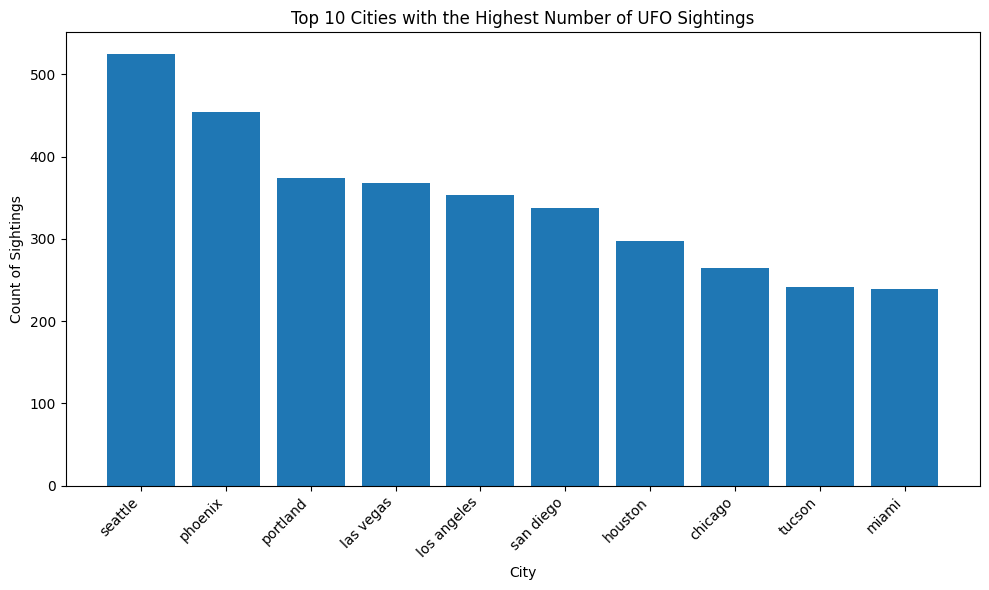

In [ ]:
#Create a bar plot for the count of a categorical feature

import matplotlib.pyplot as plt
if 'grouped_df' in locals():
  grouped_df = grouped_df.sort_values('count', ascending=False)
  top_cities = grouped_df.head(10)  # Select top 10 cities by count

  plt.figure(figsize=(10, 6))
  plt.bar(top_cities.index, top_cities['count'])
  plt.xlabel("City")
  plt.ylabel("Count of Sightings")
  plt.title("Top 10 Cities with the Highest Number of UFO Sightings")
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
  plt.tight_layout()
  plt.show()
else:
  print("'grouped_df' not found. Please run the previous code cell first.")

In [ ]:
#Using a dataset, create a line plot that shows the trend of a numerical feature over time

# Assuming 'df' is your DataFrame and it has a 'datetime' column representing time
# and a numerical column named 'duration (minutes)'

if 'datetime' in df.columns:
    try:
        df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
        # Now you can proceed with your plotting or other operations using 'datetime' column
        # Example: Extract date and time
        df['date'] = df['datetime'].dt.date
        df['time'] = df['datetime'].dt.time
        print(df[['datetime', 'date', 'time']].head())
    except Exception as e:
        print(f"An error occurred during datetime conversion: {e}")


        plt.figure(figsize=(12, 6))
        plt.plot(df_sorted['datetime'], df_sorted['duration (minutes)'])
        plt.xlabel("Time")
        plt.ylabel("Duration (minutes)")
        plt.title("Trend of UFO Sighting Durations Over Time")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("'datetime' column not found in the DataFrame.")

             datetime        date      time
0 1949-10-10 20:30:00  1949-10-10  20:30:00
1 1949-10-10 21:00:00  1949-10-10  21:00:00
2 1955-10-10 17:00:00  1955-10-10  17:00:00
3 1956-10-10 21:00:00  1956-10-10  21:00:00
4 1960-10-10 20:00:00  1960-10-10  20:00:00


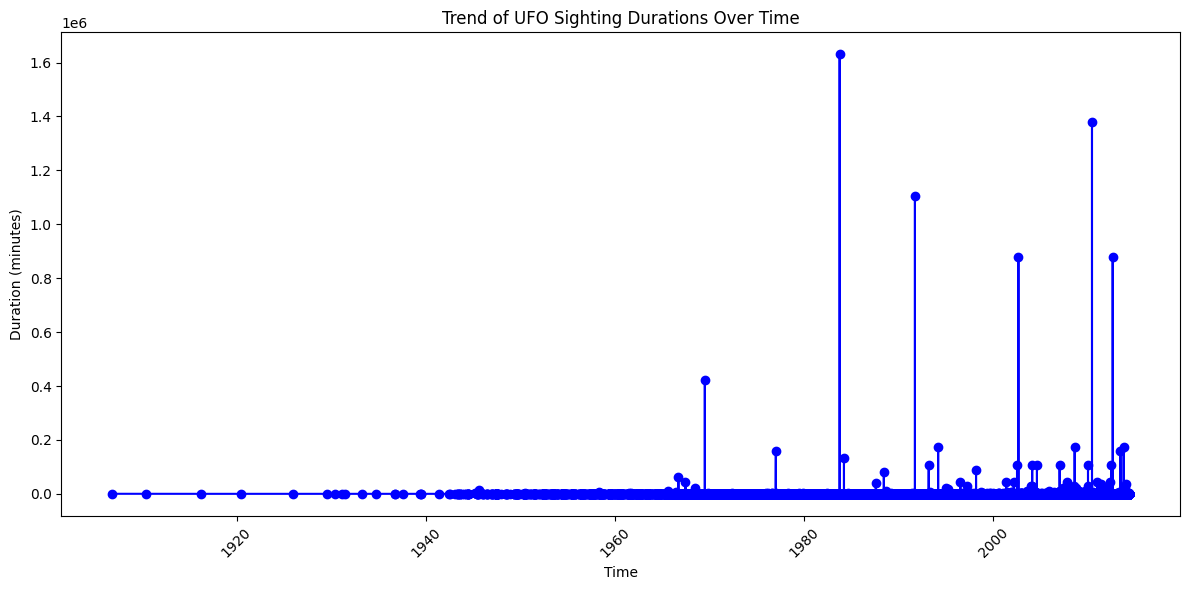

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

if 'datetime' in df.columns:
    try:
        df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
        df = df.dropna(subset=['datetime'])  # Remove rows where datetime conversion failed
        df_sorted = df.sort_values(by='datetime')
        plt.figure(figsize=(12, 6))
        plt.plot(df_sorted['datetime'], df_sorted['duration (minutes)'], marker='o', color='b', linestyle='-')
        plt.xlabel("Time")
        plt.ylabel("Duration (minutes)")
        plt.title("Trend of UFO Sighting Durations Over Time")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred during datetime conversion: {e}")
else:
    print("'datetime' column not found in the DataFrame.")


In [ ]:
#Convert date column to datetime and extract year, month, day

# Assuming 'df' is your DataFrame and it has a 'datetime' column
if 'datetime' in df.columns:
    try:
        # Convert the 'datetime' column to datetime objects
        df['datetime'] = pd.to_datetime(df['datetime'])

        # Extract year, month, and day
        df['year'] = df['datetime'].dt.year
        df['month'] = df['datetime'].dt.month
        df['day'] = df['datetime'].dt.day

        # Print the updated DataFrame with the new columns
        print(df[['datetime', 'year', 'month', 'day']].head())

    except ValueError as e:
        print(f"Error converting 'datetime' column: {e}")
    except KeyError as e:
        print(f"Error: Column 'datetime' not found in the DataFrame. {e}")
else:
    print("Error: 'datetime' column not found in the DataFrame.")

             datetime  year  month  day
0 1949-10-10 20:30:00  1949     10   10
1 1949-10-10 21:00:00  1949     10   10
2 1955-10-10 17:00:00  1955     10   10
3 1956-10-10 21:00:00  1956     10   10
4 1960-10-10 20:00:00  1960     10   10


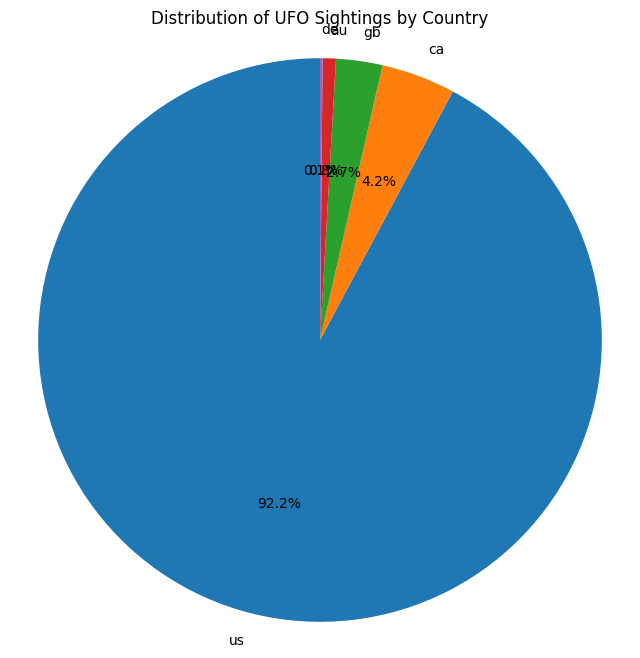

In [ ]:
#Create a pie chart for the distribution of categories

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and you want to create a pie chart for the 'country' column
if 'country' in df.columns:
    country_counts = df['country'].value_counts()
    plt.figure(figsize=(8, 8))  # Adjust figure size as needed
    plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title("Distribution of UFO Sightings by Country")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("'country' column not found in the DataFrame.")

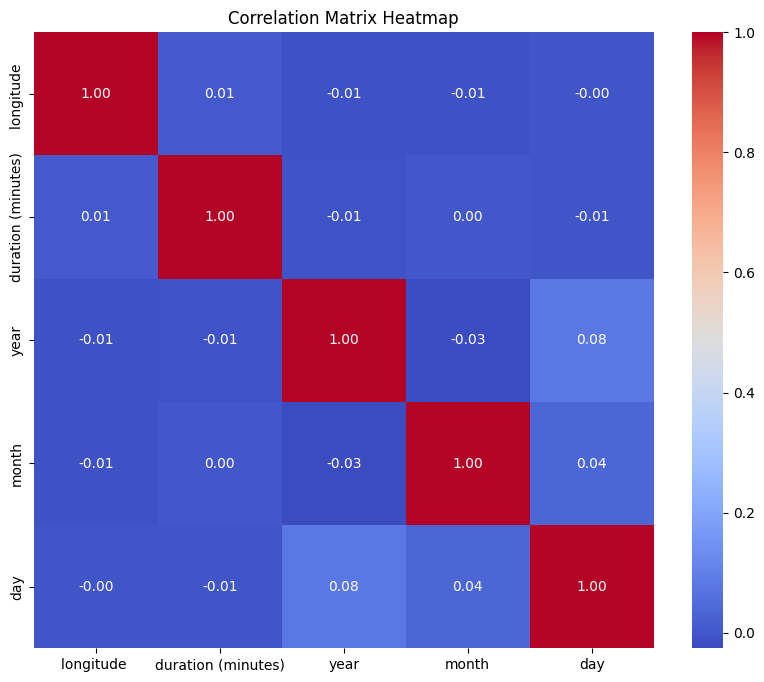

In [ ]:
# Compute and plot a heatmap of correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# Sort by a numerical column and rank another column

# Assuming 'df' is your DataFrame and it has columns 'duration (minutes)' and 'city'
if 'duration (minutes)' in df.columns and 'city' in df.columns:
    # Sort the DataFrame by 'duration (minutes)' in descending order
    df_sorted = df.sort_values('duration (minutes)', ascending=False)

    # Assign ranks based on the sorted 'duration (minutes)'
    df_sorted['duration_rank'] = df_sorted['duration (minutes)'].rank(ascending=False, method='dense')

    # Display the DataFrame with the new 'duration_rank' column
    print(df_sorted[['city', 'duration (minutes)', 'duration_rank']].head(20))
else:
    print("'duration (minutes)' or 'city' column not found in the DataFrame.")

                              city  duration (minutes)  duration_rank
559        birmingham (uk/england)        1.630600e+06            1.0
53384              ottawa (canada)        1.380000e+06            2.0
74660                   greenbrier        1.104600e+06            3.0
69215                    englewood        8.770533e+05            4.0
64390                       finley        8.770533e+05            4.0
52709        somerset (uk/england)        4.208000e+05            5.0
71172               virginia beach        1.754400e+05            6.0
6991                      oklahoma        1.754400e+05            6.0
30596                      menifee        1.754400e+05            6.0
10853                   new canaan        1.578000e+05            7.0
54009  mostar (bosnia/herzogovina)        1.578000e+05            7.0
31486                      griffin        1.315800e+05            8.0
30590                       ganado        1.052000e+05            9.0
21527              i

In [ ]:
#Identify and remove duplicate rows

# Assuming 'df' is your DataFrame
df = df.drop_duplicates()
df

,datetime,city,state,country,shape,duration (hours/min),comments,date posted,latitude,longitude,duration (minutes),date,time,year,month,day
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,45.000000,1949-10-10,20:30:00,1949,10,10
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,120.000000,1949-10-10,21:00:00,1949,10,10
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,0.333333,1955-10-10,17:00:00,1955,10,10
3,1956-10-10 21:00:00,edna,tx,us,circle,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,0.333333,1956-10-10,21:00:00,1956,10,10
4,1960-10-10 20:00:00,kaneohe,hi,us,light,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,15.000000,1960-10-10,20:00:00,1960,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444,10.000000,2013-09-09,21:15:00,2013,9,9
80328,2013-09-09 22:00:00,boise,id,us,circle,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500,20.000000,2013-09-09,22:00:00,2013,9,9
80329,2013-09-09 22:00:00,napa,ca,us,other,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444,20.000000,2013-09-09,22:00:00,2013,9,9
80330,2013-09-09 22:20:00,vienna,va,us,circle,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556,0.083333,2013-09-09,22:20:00,2013,9,9


In [ ]:
#Convert date column to datetime and extract year, month, day

# Assuming 'df' is your DataFrame and it has a 'datetime' column
if 'datetime' in df.columns:
    try:
        # Convert the 'datetime' column to datetime objects, handling errors
        df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

        # Extract year, month, and day
        df['year'] = df['datetime'].dt.year
        df['month'] = df['datetime'].dt.month
        df['day'] = df['datetime'].dt.day

        # Print the updated DataFrame to verify
        print(df[['datetime', 'year', 'month', 'day']].head())

    except Exception as e:
        print(f"An error occurred during datetime conversion: {e}")
else:
    print("'datetime' column not found in the DataFrame.")

             datetime  year  month  day
0 1949-10-10 20:30:00  1949     10   10
1 1949-10-10 21:00:00  1949     10   10
2 1955-10-10 17:00:00  1955     10   10
3 1956-10-10 21:00:00  1956     10   10
4 1960-10-10 20:00:00  1960     10   10


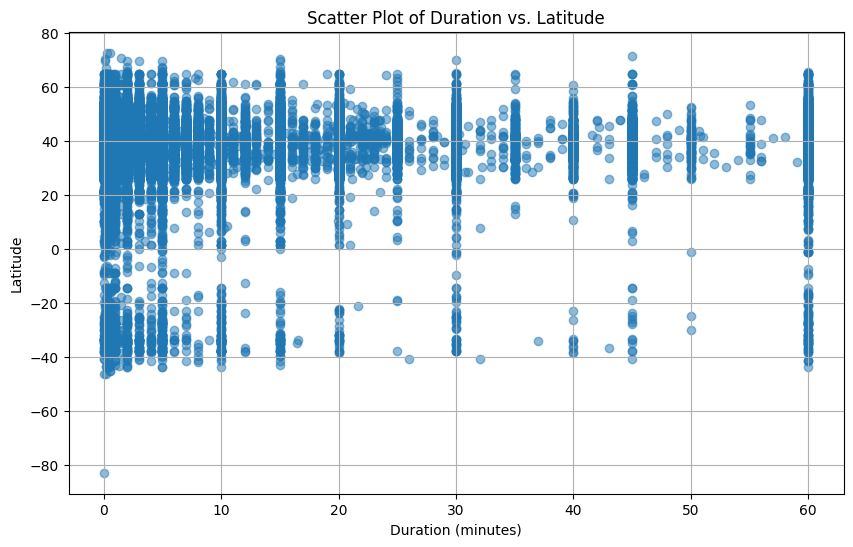

In [ ]:
#8.Create a scatter plot of two numerical columns. Add a title, labels, and a legend to the plot
import matplotlib.pyplot as plt
if 'duration (minutes)' in df.columns and 'latitude' in df.columns:
    # Convert columns to numeric, handling errors
    df['duration (minutes)'] = pd.to_numeric(df['duration (minutes)'], errors='coerce')
    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df = df.dropna(subset=['duration (minutes)', 'latitude'])

    plt.figure(figsize=(10, 6))
    plt.scatter(df['duration (minutes)'], df['latitude'], alpha=0.5)
    plt.xlabel("Duration (minutes)")
    plt.ylabel("Latitude")
    plt.title("Scatter Plot of Duration vs. Latitude")
    plt.grid(True)
    plt.show()
else:
    print("'duration (minutes)' or 'latitude' column not found in the DataFrame.")

In [ ]:
# Fetch the content of a webpage and display the first 500 characters

import requests

def fetch_webpage_content(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error fetching webpage: {e}")
        return None

# Example usage with a random webpage
url = "https://stjohnsbayrum.com/"  # Replace with the desired URL
content = fetch_webpage_content(url)

if content:
    print(content[:500]) # Print first 500 characters

<!doctype html>

<html class="no-js" lang="en">
<head>
 <script>/* start spd config */window._spt_delay_keywords=["/gtag/js,gtag(,/checkouts,/tiktok-track.js,/hotjar-,/smile-,/adoric.js,/wpm/,fbq("];/* end spd config */</script>        <script>window.technicalTptCast="043fmfy4q2rni6tj9n2jpznzkz19m6pxj0,sewv4074ew8olle8v4o0a1qwhoz46qa8o1,t3jby3897pnyx6kdptnr.qjgmsr4md96jp,pj9u16vyidwda672u,wv3oh0w9.qxu1a8o1,sssawv3oh0w9.qxu1a8o1,.vk29485cw7qqqk8bnsba,sssawv3oh0w8o1z.0qa8o1,.ky7t.ma0ktyaqmsx3ub62,


In [ ]:
from bs4 import BeautifulSoup

def extract_hyperlinks(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    links = []
    for link in soup.find_all('a'):
        href = link.get('href')
        if href:
            links.append(href)
    return links

# Example usage (assuming 'content' variable holds the HTML content):
if content:
    hyperlinks = extract_hyperlinks(content)
    for link in hyperlinks:
        print(link) # Indent this line to print each link

#main
/collections/all
/collections/madras-collection
/collections/bay-rum-cologne
/collections/west-indian-lime-cologne-aftershave-soap-for-men
/collections/no-77
/collections/vetiver
/collections/coral
/collections/after-shave-cologne
/collections/soaps
/collections/aluminum-free-deodorant
/collections/wedding-favors-gifts
/collections/gifts
/collections/coral
/collections/travelers-collection
/collections/st-johns-soy-candles
/pages/shop-instagram
/pages/bundles
/products/st-johns-gift-card
/pages/history-st-johns-bay-rum
/blogs/things-we-love
/blogs/news
/blogs/featured-retail-partners
/pages/contact-us
/pages/store-locator
/account/login
/search
https://www.facebook.com/stjohnsfragranceco
https://www.instagram.com/stjohnsfragrance/
https://www.pinterest.com/saintjohnsbayrum/
https://www.youtube.com/channel/UCumED1iuz6_Bp-NH-g3estw
/collections/all
/collections/all
/collections
/collections/after-shave-cologne
/collections/top-quality-all-natural-soaps-for-men
/collections/aluminum

In [ ]:
#Extract all text within <p> tags

import re
from bs4 import BeautifulSoup

def extract_text_within_p_tags(html_content):
    """
    Extracts all text within <p> tags from HTML content.

    Args:
        html_content: The HTML content as a string.

    Returns:
        A list of strings, where each string is the text content of a <p> tag.
        Returns an empty list if no <p> tags are found or if the input is invalid.
    """
    try:
        soup = BeautifulSoup(html_content, 'html.parser')
        p_tags = soup.find_all('p')
        extracted_text = [p.get_text(strip=True) for p in p_tags]
        return extracted_text
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Example usage (assuming you have HTML content in the 'content' variable from previous code):
if 'content' in locals() and content:  # Check if 'content' variable exists and is not empty
    extracted_p_text = extract_text_within_p_tags(content)
    if extracted_p_text:
        for text in extracted_p_text:
            print(text)
    else:
        print("No text found within <p> tags or invalid HTML content.")
else:
    print("The 'content' variable is not defined or is empty. Please fetch the webpage content first.")

Spend$55more and get free shipping!
Your cart is empty
Free shipping  over $55
What's New
Madras
Shop Gift Sets
Starting with our original St Johns Bay Rum fragrance, our company has been going strong for 75 years and counting.
Subscribe to receive updates, access to exclusive deals, and more.
Email:admin@stjohnsbayrum.com
Telephone:1.888.342.0458Stateside Address:470 Main StreetRidgefield, CT 06877
USVI Address:5194 Dronningens Gade, Suite 3StThomas, USVI 00802


In [ ]:
df1 = pd.DataFrame({'StudentID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [20, 21, 19]})
df2 = pd.DataFrame({'StudentID': [1, 2, 3], 'Course': ['Math', 'Science', 'History'], 'Grade': ['A', 'B', 'A']})
merged_df = pd.merge(df1, df2, on='StudentID')
print("Merged DataFrame:\n", merged_df)


Merged DataFrame:
    StudentID     Name  Age   Course Grade
0          1    Alice   20     Math     A
1          2      Bob   21  Science     B
2          3  Charlie   19  History     A


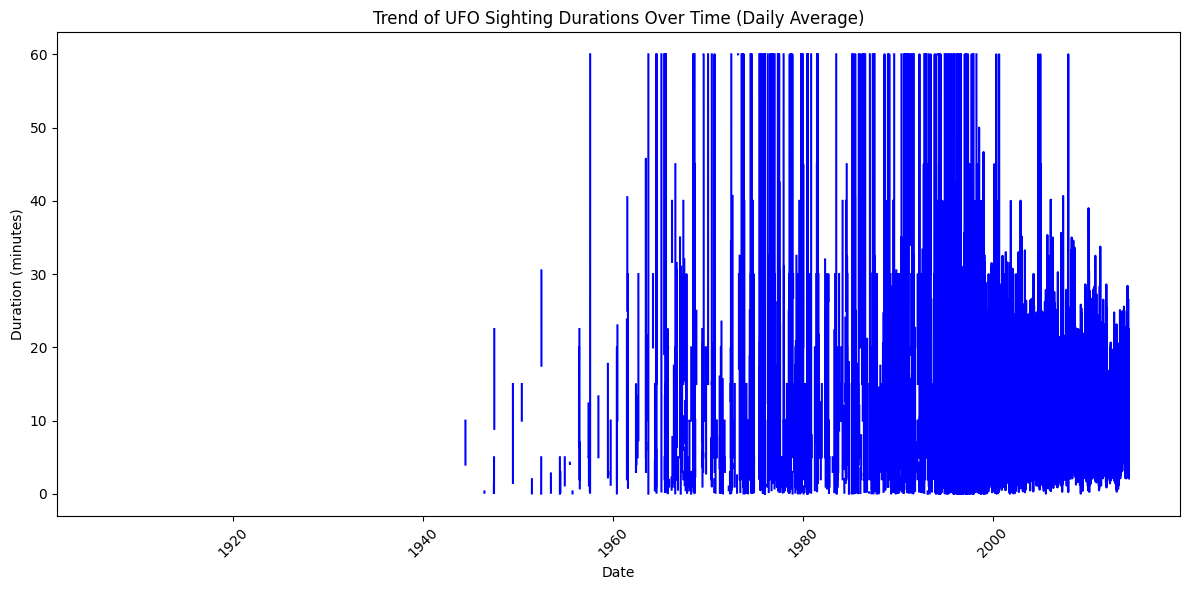

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'datetime' and 'duration (minutes)' columns
if 'datetime' in df.columns:
    try:
        # Convert 'datetime' column to datetime format, dropping rows with failed conversions
        df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
        df = df.dropna(subset=['datetime'])  # Remove rows where datetime conversion failed

        # Handle outliers by capping 'duration (minutes)' at the 95th percentile
        duration_95th_percentile = df['duration (minutes)'].quantile(0.95)
        df['duration (minutes)'] = df['duration (minutes)'].clip(upper=duration_95th_percentile)

        # Resample data by a daily frequency to create a smoother time series
        df.set_index('datetime', inplace=True)
        df_resampled = df['duration (minutes)'].resample('D').mean()

        # Plot the trend of 'duration (minutes)' over time after resampling
        plt.figure(figsize=(12, 6))
        plt.plot(df_resampled.index, df_resampled, marker='', color='b', linestyle='-')
        plt.xlabel("Date")
        plt.ylabel("Duration (minutes)")
        plt.title("Trend of UFO Sighting Durations Over Time (Daily Average)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("'datetime' column not found in the DataFrame.")
